In [68]:

import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobpsf
from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import imshow1, imshow2, imshow3
import scoobpsf.scoobi as scoobi

import purepyindi
from purepyindi import INDIClient
client0 = INDIClient('localhost', 7624)
client0.start()

import purepyindi2
from purepyindi2 import IndiClient
client = IndiClient()
client.connect()
client.get_properties()

In [2]:
reload(scoobi)
xc, yc = (4263, 2920)
npsf = 256
scoobi.set_zwo_roi(xc, yc, npsf, client0)

In [3]:
reload(scoobi)
tbi = scoobi.SCOOBI(cam_channel='scicam', dm_channel='dm00disp05')
tbi.zero_dm()

# Do the normalization

In [8]:
scoobi.move_psf(-20, 0, client0)

In [10]:
reload(scoobi)
tbi.set_zwo_exp_time(0.00001, client0)

Set the ZWO exposure time to 3.20e-05s


In [11]:
reload(scoobi)
tbi.set_zwo_emgain(1, client0)

Set the ZWO gain setting to 1.0


In [12]:
reload(scoobi)
tbi.set_fib_atten(10, client)

Set the fiber attenuation to 10.0


INFO:utils:Got semaphore index 1.


33075.48


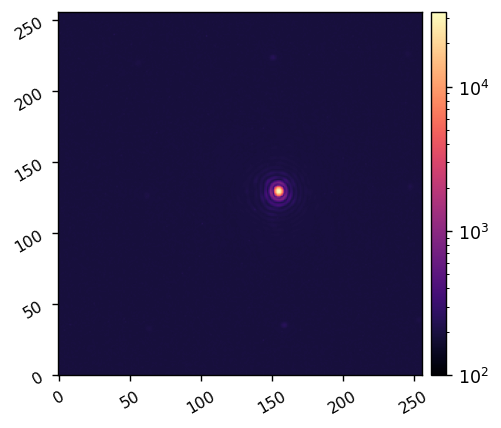

In [13]:
tbi.Nframes = 100
ref_psf = tbi.snap()
print(xp.max(ref_psf))
imshow1(ref_psf, lognorm=True, vmin=1e2)

In [14]:
tbi.Imax_ref = copy.copy(xp.max(ref_psf))
tbi.texp_ref = copy.copy(tbi.texp)
tbi.att_ref = copy.copy(tbi.att)
tbi.gain_ref = copy.copy(tbi.gain)
print(tbi.Imax_ref, tbi.texp_ref, tbi.att_ref, tbi.gain_ref  )

33075.48 3.19999999192078e-05 10 1


In [91]:
reload(scoobi)
tbi = scoobi.SCOOBI(cam_channel='scicam', dm_channel='dm00disp05')
tbi.zero_dm()

tbi.Imax_ref = copy.copy(xp.max(ref_psf))
tbi.texp_ref = 3.2e-5
tbi.att_ref = 10
tbi.gain_ref = 1
print(tbi.Imax_ref, tbi.texp_ref, tbi.att_ref, tbi.gain_ref  )

33075.48 3.2e-05 10 1


In [ ]:
scoobi.move_psf(4, 0, client0)

In [ ]:
scoobi.move_psf(0, 2, client0)

In [92]:
tbi.set_fib_atten(0, client)

Set the fiber attenuation to 0.0


In [125]:
tbi.set_zwo_exp_time(0.002, client0)

Set the ZWO exposure time to 2.00e-03s


In [120]:
tbi.set_zwo_emgain(120, client0)

Set the ZWO gain setting to 120.0


In [126]:
reload(scoobi)
scoobi.move_block_in(client0)

In [ ]:
reload(scoobi)
scoobi.move_block_out(client0)

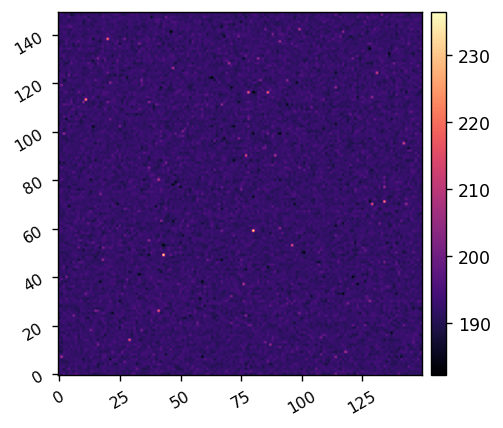

In [129]:
tbi.Nframes = 100
tbi.subtract_dark = False
tbi.return_ni = False
dark_frame = tbi.snap()
imshow1(dark_frame)

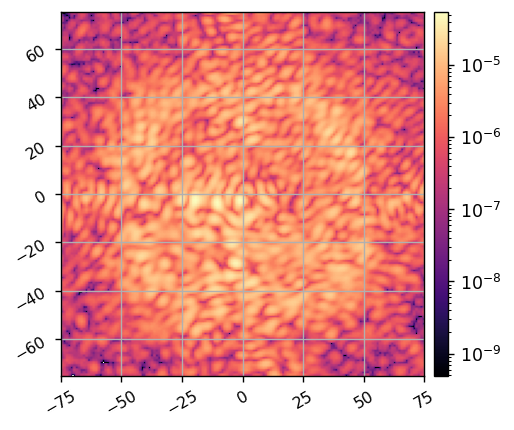

In [131]:
tbi.Nframes = 10
tbi.npsf = 150
tbi.x_shift = -5
tbi.y_shift = -4

tbi.df = dark_frame
tbi.subtract_dark = True
tbi.return_ni = True

coro_im = tbi.snap()
imshow1(coro_im, lognorm=True, pxscl=1, grid=True)

In [ ]:
from magpyx.fdpr2 import console, tools
config_params = tools.Configuration('fdpr2_kilo_dmdiv')
fitdict, Imeas_cen = console.estimate_oneshot(config_params)